<img src="https://png.pngtree.com/png_detail/18/09/10/pngtree-red-shoes-png-clipart_2900183.jpg" style="height:200px;">

# Advent of Code

# --- Day 3: No Matter How You Slice It ---

### Problem 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
file = open("input.txt", "r")
lines = file.readlines()

In [3]:
# Cleaning function
characters1 = ["#", "@", ":"]
characters2 = [",", "x"]


def cleaning_line(line):
    for c in characters1:
        line = line.replace(c, '')
    for c in characters2:
        line = line.replace(c, " ")
    line = line.split()
    line = map(int, line)
    return line

In [4]:
# Loading claims
claims = []

for line in lines:
    line = cleaning_line(line)
    claims.append(line)

claims = pd.DataFrame(claims)
claims.columns = ['ID', 'Left_Edge', 'Top_Edge', 'Wide', 'Tall']
claims.head()

,ID,Left_Edge,Top_Edge,Wide,Tall
0,1,935,649,22,22
1,2,346,47,19,26
2,3,218,455,25,17
3,4,451,711,10,20
4,5,797,342,28,27


In [5]:
# Building fabric
max_width = claims.Left_Edge.max() + claims.Wide.max()
max_heigth = claims.Top_Edge.max() + claims.Tall.max()
fabric = np.zeros((max_heigth, max_width))

In [6]:
# Fabric claimed by the Elfs
for claim in claims.iterrows():
    loc = (claim[1][1], claim[1][2])
    wide = claim[1][3]
    tall = claim[1][4]
    for i in range(loc[0], (loc[0]+wide)):
        for j in range(loc[1], (loc[1]+tall)):
            fabric[i, j] += 1

In [7]:
# Number of overlaps
len(np.where(fabric > 1)[0])

111326

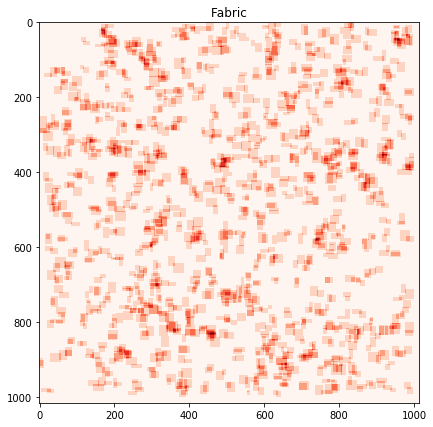

In [8]:
# Let's see the fabric
figure(figsize=(7, 7))
plt.imshow(fabric, cmap="Reds")
plt.title("Fabric")
plt.show()

### Problem 2

In [9]:
for claim in claims.iterrows():
    loc = (claim[1][1], claim[1][2])
    wide = claim[1][3]
    tall = claim[1][4]
    flag = 0
    for i in range(loc[0], (loc[0]+wide)):
        for j in range(loc[1], (loc[1]+tall)):
            if fabric[i, j] != 1:
                flag = 1
    if flag == 0:
        print(claim)
        print(f"The only claim that doesn't overlap is #{claim[1][0]}.")

(1018, ID           1019
Left_Edge     436
Top_Edge      770
Wide           14
Tall           22
Name: 1018, dtype: int64)
The only claim that doesn't overlap is #1019.


In [10]:
file.close()